# Background research

### Load Library

In [1]:
# standard libs
import os
import pandas as pd
import numpy as np

print(os.getcwd())

/Users/karlpolak/Documents/Studie/MSCE 2/MDA-project


## Data

### Import Data

The starting point of this project is CDP, a non-profit organization helping governments and companies reduce their environment impact. Their approach consists of acquiring data and performing data analyses. 

This project starts by extracting qualitative insights from the questionnaires that CDP yearly distributes among almost all countries across the globe. This section will extract the five most prominent water related issues that currently are experienced by countries. Further down the project, the most prominent, i.e. water stress, will be investigated properly.

In [2]:
# import cities response df
cities21_df = pd.read_csv("https://mda-project-poland.s3.eu-west-3.amazonaws.com/2021_Cities_Water_Security_Risks.csv")
cities20_df = pd.read_csv("https://mda-project-poland.s3.eu-west-3.amazonaws.com/2020_Full_Cities_Dataset.csv")
cities19_df = pd.read_csv("https://mda-project-poland.s3.eu-west-3.amazonaws.com/2019_Full_Cities_Dataset.csv")



### Data Cleaning



In [3]:
risk21=cities21_df.rename(columns={'Account Name': 'City'})
risk21.dropna(subset=['Water security risk drivers'],inplace=True)
risk21.drop_duplicates(inplace=True)

cities20_df = cities20_df[cities20_df['Question Number'] == '14.2a']\
    .rename(columns={'Organization': 'City'})
cities20_df.dropna(subset=['Response Answer'],inplace=True)
risk20=cities20_df.pivot_table(index=['Account Number', 'City', 'Row Number'],
                               columns='Column Name',
                               values='Response Answer',
                               aggfunc=lambda x: ' '.join(x)).reset_index()
risk20.drop_duplicates(inplace=True)

cities19_df = cities19_df[
    cities19_df['Question Name'] == 
    'Please identify the risks to your city’s water supply as well as the timescale and level of risk.']\
    .rename(columns={'Organization': 'City'})
cities19_df.dropna(subset=['Response Answer'],inplace=True)
risk19=cities19_df.pivot_table(index=['Account Number', 'City', 'Row Number'],
                               columns='Column Name',
                               values='Response Answer',
                               aggfunc=lambda x: ' '.join(x)).reset_index()
idx=(risk19['Risks']=='Inadequate or ageing infrastructure')
risk19.loc[idx,'Risks']='Inadequate or ageing water supply infrastructure'
risk19=risk19.rename(columns={'Risks':'Water security risk drivers'})
risk19.drop_duplicates(inplace=True)
risk21.head()#cdpdata of 2021

,Questionnaire Name,Account Number,City,Country,CDP Region,ParentSection,Section,Question Number,Question Name,Row Number,Water security risk drivers,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description
0,Cities 2021,1093,"City of Atlanta, GA",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Short-term (by 2025),Serious,NaN,The city depends on one river for water supply...
1,Cities 2021,1093,"City of Atlanta, GA",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Higher water prices,Current,Serious,NaN,The water cost burden is felt across all ZIP c...
2,Cities 2021,1184,"City of Austin, TX",United States of America,North America,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Short-term (by 2025),Extremely serious,High,Central Texas is drought prone and we depend o...
3,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,1,Increased water stress,Current,Serious,Medium-high,The downscaling of the climate projections at ...
4,Cities 2021,1499,Ajuntament de Barcelona,Spain,Europe,14. Water Security,Water Supply,14.2a,Please identify the risks to your city’s water...,2,Declining water quality,Medium-term (by 2050),Less Serious,Medium,A reduction in water resources availability c...


In [4]:
#cdp data of 2020
risk20.head()

Column Name,Account Number,City,Row Number,Anticipated timescale,Estimated magnitude of potential impact,Estimated probability of impact,Risk description,Water security risk drivers
0,1184,City of Austin,1,Short-term (by 2025),Extremely serious,High,Central Texas is drought prone and we depend o...,Increased water stress
1,1499,Ajuntament de Barcelona,1,Current,Serious,Medium-high,The downscaling of the climate projections at ...,Increased water stress
2,1499,Ajuntament de Barcelona,2,Medium-term (by 2050),Less Serious,Medium,A reduction in water resources availability c...,Declining water quality
3,1499,Ajuntament de Barcelona,3,Current,Serious,Medium-high,"In terms of water supply, rivers floods could ...",Severe weather events
4,1499,Ajuntament de Barcelona,4,Current,Serious,Medium-high,Climate Plan vulnerability assessement showed ...,Increased water scarcity


In [5]:
#cdp data of 2019
risk19.head()

Column Name,Account Number,City,Row Number,Estimated magnitude,Estimated timescale,Risk description,Water security risk drivers
0,1093,City of Atlanta,1,Serious,Short-term,The city depends on one river for water supply...,Increased water stress
1,1093,City of Atlanta,2,Serious,Current,The water cost burden is felt across all ZIP c...,Higher water prices
2,1184,City of Austin,1,Extremely serious,Short-term,Central Texas is drought prone and we depend o...,Increased water stress
3,1499,Ajuntament de Barcelona,1,Less Serious,Current,The downscaling of the climate projections at ...,Increased water stress
4,1499,Ajuntament de Barcelona,2,Less Serious,Medium-term,A reduction in water resources availability c...,Declining water quality


### EDA

Counting the frequencies of reported risks in per year.

In [6]:
def countrisk(df):
    df1=pd.crosstab(index=df['Water security risk drivers'], columns='count').sort_values(by='count',ascending=False)
    if sum(df1.index.isin(['Question not applicable']))>0:df1.drop('Question not applicable',inplace=True)
    df1=df1[df1['count']>5]
    return(df1)

<AxesSubplot:ylabel='count'>

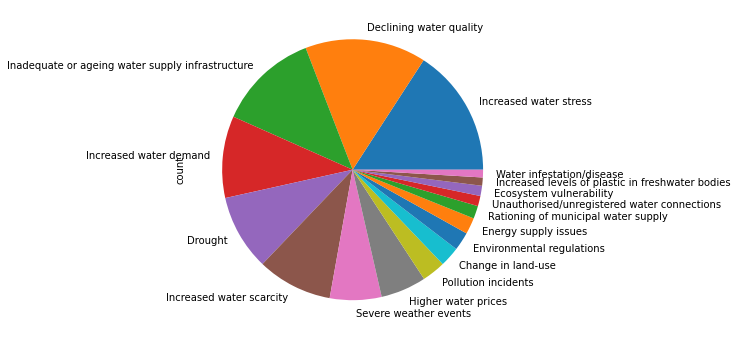

In [7]:
df21=countrisk(risk21)
df21.plot.pie(y='count',figsize=(6,6),legend=False)

<AxesSubplot:ylabel='count'>

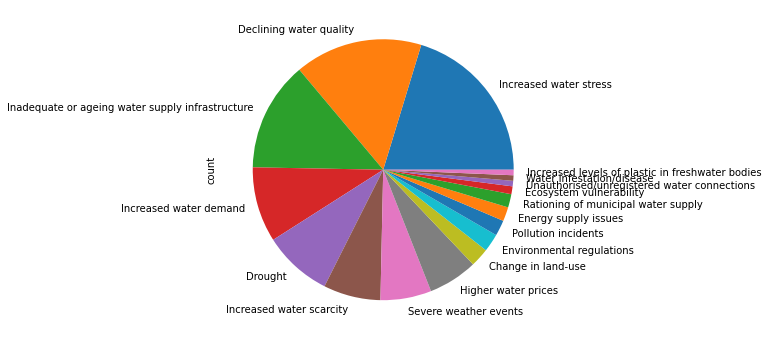

In [8]:
df20=countrisk(risk20)
df20.plot.pie(y='count',figsize=(6,6),legend=False)

<AxesSubplot:ylabel='count'>

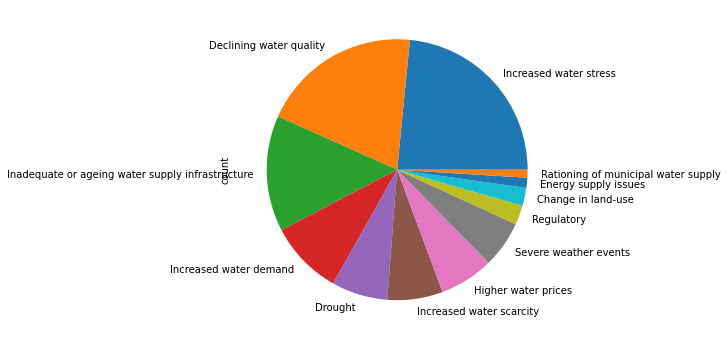

In [9]:
df19=countrisk(risk19)
df19.plot.pie(y='count',figsize=(6,6),legend=False)

In [10]:
df21=df21.rename(columns={'count': 'count21'})
df20=df20.rename(columns={'count': 'count20'})
df19=df19.rename(columns={'count': 'count19'})
outer_merged = pd.merge(df21, df20, how="outer",on='Water security risk drivers')
outer_merged = pd.merge(outer_merged , df19, how="outer",on='Water security risk drivers')
outer_merged

col_0,count21,count20,count19
Water security risk drivers,,,
Increased water stress,250.0,209.0,263.0
Declining water quality,237.0,163.0,223.0
Inadequate or ageing water supply infrastructure,197.0,140.0,161.0
Increased water demand,160.0,96.0,103.0
Drought,148.0,88.0,78.0
Increased water scarcity,147.0,73.0,77.0
Severe weather events,101.0,65.0,65.0
Higher water prices,89.0,63.0,75.0
Pollution incidents,46.0,20.0,NaN


The most frequent 5 risk drivers for these three years are identical. They are Increased water stress,Declining water quality,Inadequate water supply infrastructure,Increased water demand and Drought.

## Overview

We are going to see the number and distribution of five major risks in each region.

In [11]:
idx=risk21['Water security risk drivers'].isin(outer_merged.index[0:5].tolist())
risk5_2021=risk21.loc[idx,['CDP Region','City','Water security risk drivers']].drop_duplicates()
risk5=risk5_2021.pivot_table(index=['CDP Region'],columns='Water security risk drivers',values='City',
                             aggfunc=lambda x: len(x),margins=True).sort_values(by='All',ascending=True)
risk5

Water security risk drivers,Declining water quality,Drought,Inadequate or ageing water supply infrastructure,Increased water demand,Increased water stress,All
CDP Region,,,,,,
Middle East,2.0,NaN,2.0,2.0,4.0,10
South and West Asia,3.0,1.0,4.0,4.0,5.0,17
East Asia,7.0,5.0,7.0,4.0,9.0,32
Africa,18.0,12.0,24.0,14.0,13.0,81
Southeast Asia and Oceania,27.0,15.0,20.0,23.0,19.0,104
Europe,54.0,34.0,27.0,27.0,46.0,188
North America,49.0,33.0,53.0,28.0,66.0,229
Latin America,65.0,45.0,53.0,54.0,79.0,296
All,225.0,145.0,190.0,156.0,241.0,957


[]

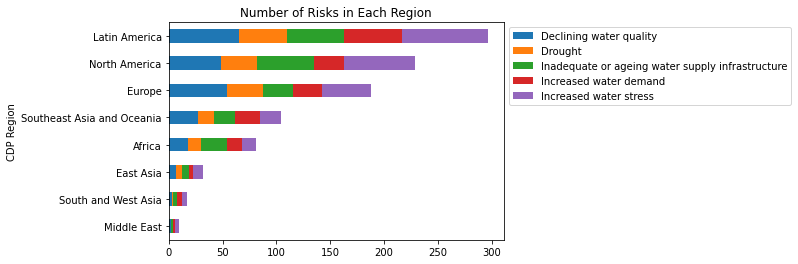

In [12]:
ax = risk5.iloc[:-1,:-1].plot.barh(stacked=True,
        title='Number of Risks in Each Region')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()

In [13]:
risk_proportion=risk5.copy()
for col in risk_proportion.iloc[:,:-1].columns:
  risk_proportion[col]=risk_proportion[col]/risk_proportion['All']
risk_proportion

Water security risk drivers,Declining water quality,Drought,Inadequate or ageing water supply infrastructure,Increased water demand,Increased water stress,All
CDP Region,,,,,,
Middle East,0.200000,NaN,0.200000,0.200000,0.400000,10
South and West Asia,0.176471,0.058824,0.235294,0.235294,0.294118,17
East Asia,0.218750,0.156250,0.218750,0.125000,0.281250,32
Africa,0.222222,0.148148,0.296296,0.172840,0.160494,81
Southeast Asia and Oceania,0.259615,0.144231,0.192308,0.221154,0.182692,104
Europe,0.287234,0.180851,0.143617,0.143617,0.244681,188
North America,0.213974,0.144105,0.231441,0.122271,0.288210,229
Latin America,0.219595,0.152027,0.179054,0.182432,0.266892,296
All,0.235110,0.151515,0.198537,0.163009,0.251829,957


[]

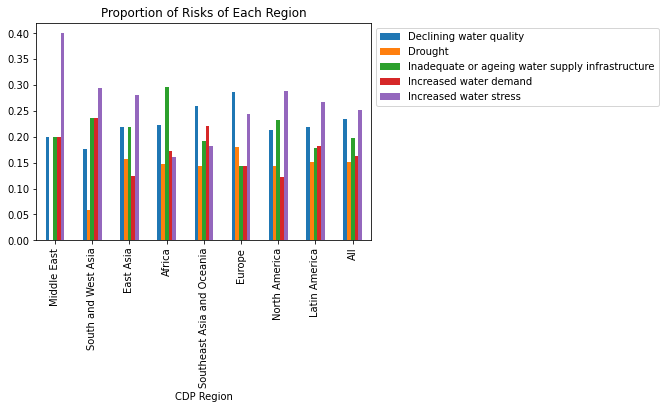

In [14]:
ax = risk_proportion.iloc[:,:-1].plot.bar(
        title='Proportion of Risks of Each Region')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()